In [ ]:
#-----------------------------------project 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('DS1_C4_S9_Car_Data_cleaned.xlsx')
df
#imputing the cleaned data set  where we analysed in project part 1


,Unnamed: 0,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
0,0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,...,Yes,Yes,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
1,1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,...,Not Available,Yes,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
2,2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,...,Not Available,Yes,Yes,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
3,3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,...,Yes,Yes,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
4,4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,...,Not Available,Yes,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1545 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
1272,1272,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1550 kg,"Drive side airbag, Curtain airbags, Driver fro...",Yes,Yes
1273,1273,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1482 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes
1274,1274,1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1455 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes


In [4]:

df.replace('Not Available', np.nan, inplace=True)

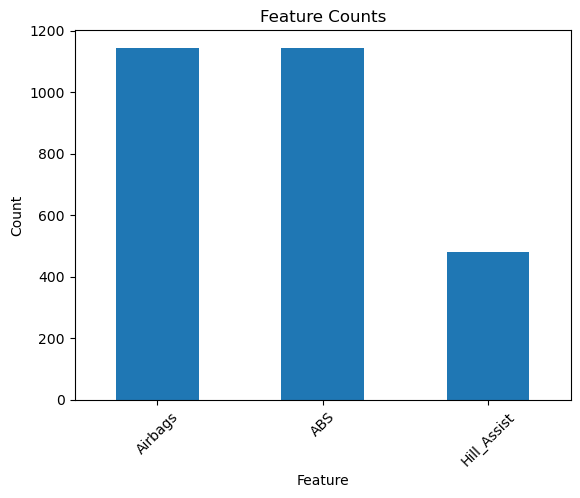

Airbags 1144
ABS 1144
Hill_Assist 480


In [5]:
# TASK 1
import matplotlib.pyplot as plt
feature_counts = pd.DataFrame({'Airbags': [df['Airbags'].value_counts().sum()],
                               'ABS': [df['ABS_(Anti-lock_Braking_System)'].value_counts().sum()],
                               'Hill_Assist': [df['Hill_Assist'].value_counts().sum()]}, 
                              index = ['Total'])
feature_counts.T.plot(kind='bar', legend=False)
plt.title('Feature Counts')
plt.ylabel('Count')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.show()
print('Airbags', df['Airbags'].value_counts().sum())
print('ABS',df['ABS_(Anti-lock_Braking_System)'].value_counts().sum())
print('Hill_Assist',df['Hill_Assist'].value_counts().sum())


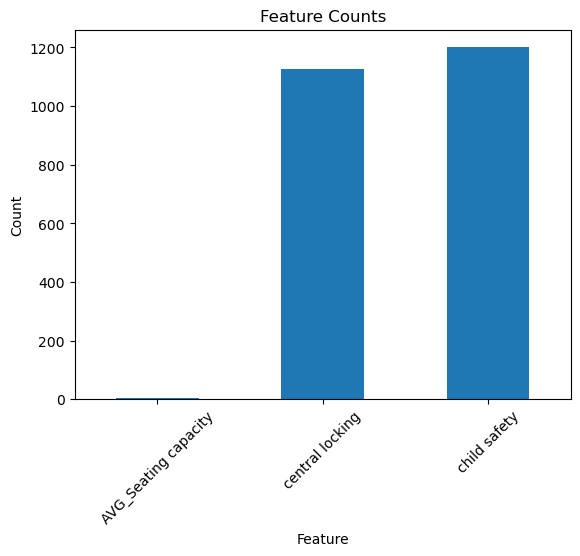

AVG_Seating capacity 5.270078740157481
central locking 1127
child safety 1201


In [6]:
# TASK 2
import matplotlib.pyplot as plt

# Assuming feature_counts DataFrame is already defined as you provided
feature_counts1 = pd.DataFrame({'AVG_Seating capacity': df['Seating_Capacity'].mean(),
                               'central locking': df['Central_Locking'].value_counts().sum(),
                               'child safety': df['Child_Safety_Locks'].value_counts().sum()}, 
                              index = ['Total'])

# Plot
feature_counts1.T.plot(kind='bar', legend=False)
plt.title('Feature Counts')
plt.ylabel('Count')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.show()
print('AVG_Seating capacity', df['Seating_Capacity'].mean())
print('central locking', df['Central_Locking'].value_counts().sum())
print('child safety', df['Child_Safety_Locks'].value_counts().sum())

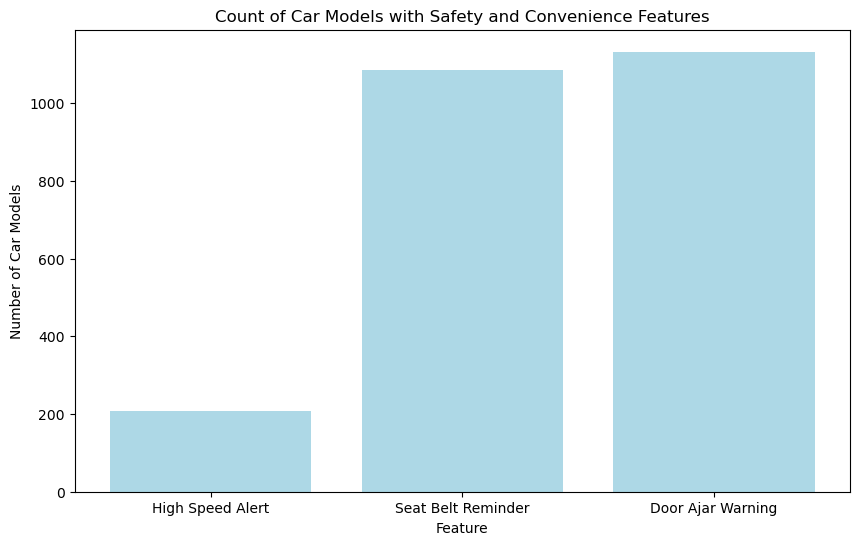

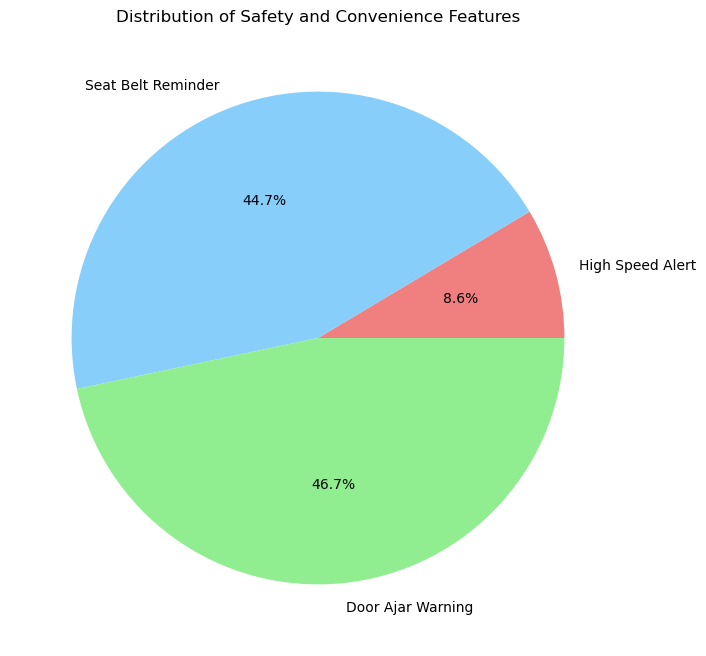

In [7]:
# TASK 3
import matplotlib.pyplot as plt

# Prepare data for visualization
feature_counts = pd.DataFrame({
    'Feature': ['High Speed Alert', 'Seat Belt Reminder', 'Door Ajar Warning'],
    'Count': [
        df['High_Speed_Alert_System'].notna().sum(),
        df['Fasten_Seat_Belt_Warning'].notna().sum(),
        df['Door_Ajar_Warning'].notna().sum()
    ]
})

# Bar Plot
plt.figure(figsize=(10, 6))
plt.bar(feature_counts['Feature'], feature_counts['Count'], color='lightblue')
plt.title('Count of Car Models with Safety and Convenience Features')
plt.xlabel('Feature')
plt.ylabel('Number of Car Models')
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(feature_counts['Count'], labels=feature_counts['Feature'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Distribution of Safety and Convenience Features')
plt.show()


Interpretation: Door Ajar Warnings and Seat belt remainder are the prevalent safety features among the car models.

In [8]:
# TASK 4
# Group by 'Make' and calculate average dimensions
average_dimensions = df.groupby('Make').agg({
    'Height_mm': 'mean',
    'Length_mm': 'mean',
    'Width_mm': 'mean'
}).reset_index()

# Print average dimensions by make
print("\nAverage dimensions by make:")
print(average_dimensions)

# Calculate overall average dimensions
overall_avg_dimensions = df[['Height_mm', 'Length_mm', 'Width_mm']].mean()

print("\nOverall average dimensions of cars:")
overall_avg_dimensions_df = pd.DataFrame(overall_avg_dimensions)
print(overall_avg_dimensions_df)

 


Average dimensions by make:
                Make    Height_mm    Length_mm     Width_mm
0       Aston Martin  1294.333333  4623.000000  1982.333333
1               Audi  1544.759342  4715.096774  1876.437113
2              Bajaj  1652.000000  2752.000000  1312.000000
3            Bentley  1563.666667  5210.166667  2140.666667
4                Bmw  1541.486486  4816.891892  1980.243243
5            Bugatti  1212.000000  4544.000000  2038.000000
6             Datsun  1520.600000  3644.400000  1605.600000
7                 Dc  1200.000000  4565.000000  2120.000000
8            Ferrari  1275.250000  4668.125000  1956.000000
9               Fiat  1517.739130  4195.086957  1708.565217
10             Force  2061.666667  4108.666667  1800.000000
11              Ford  1586.069767  4062.372093  1747.441860
12             Honda  1542.640625  4211.765625  1723.390625
13           Hyundai  1544.461538  4067.461538  1723.776923
14              Icml  1885.000000  4440.000000  1788.550506
15         

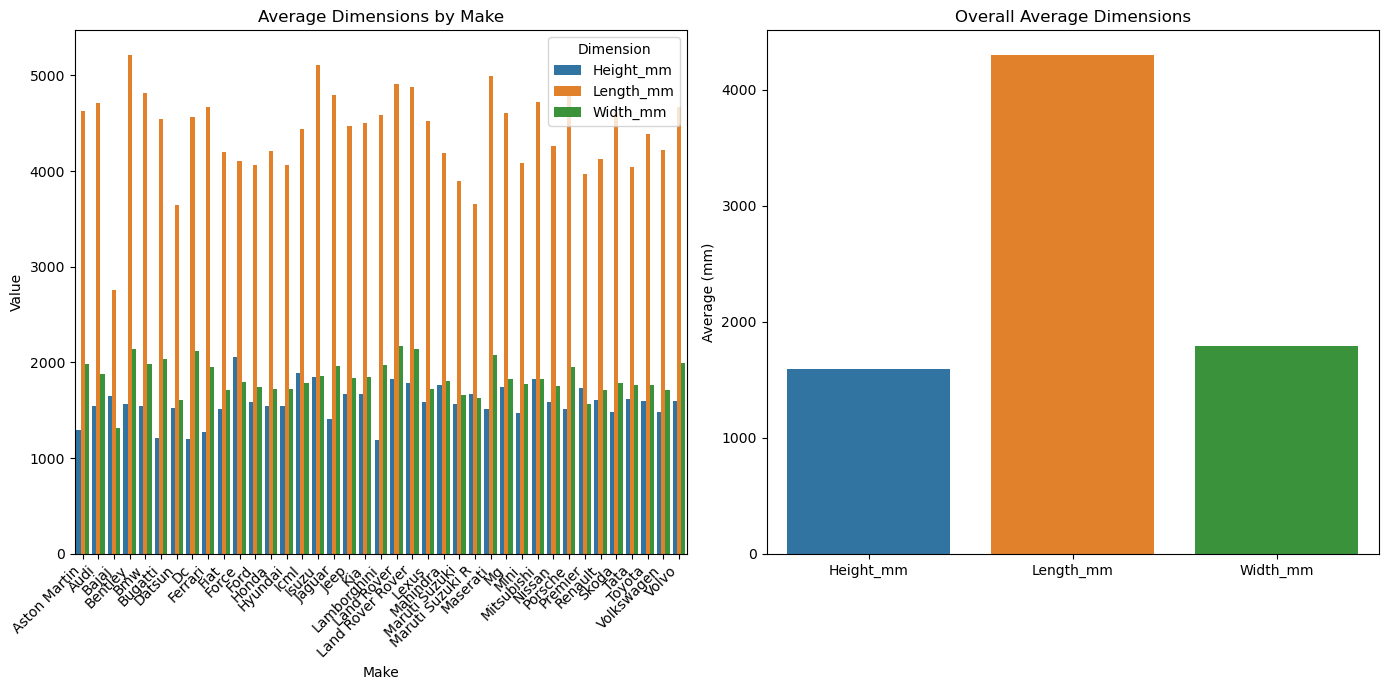

In [9]:

plt.figure(figsize=(14, 7))

# Plot average dimensions by make
plt.subplot(1, 2, 1)
sns.barplot(data=average_dimensions.melt(id_vars='Make', var_name='Dimension', value_name='Value'), x='Make', y='Value', hue='Dimension')
plt.title('Average Dimensions by Make')
plt.xticks(rotation=45, ha='right')

# Plot overall average dimensions
plt.subplot(1, 2, 2)
sns.barplot(x=overall_avg_dimensions.index, y=overall_avg_dimensions.values)
plt.title('Overall Average Dimensions')
plt.ylabel('Average (mm)')
plt.tight_layout()
plt.show()
